<a href="https://colab.research.google.com/github/Mahsabeigi33/tensorflow-pricehouse/blob/main/tensorflow_house_peredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing insta

# Import Library

In [7]:
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.filterwarnings(action = 'ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows' , None)

##Read dataset from kaggle

In [20]:
dataset = pd.read_csv('/content/sample_data/data.csv')
dataset.shape

(4600, 18)

##Data **Overview**

In [21]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [22]:
# for demonstration lets drop features other than numerical.
dataset.drop(['date','street','city','statezip','country'],inplace=True,axis=1)
dataset.head()
X=dataset.drop('price',axis=1)
y=dataset.price

In [23]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## SalePrice Frequency Distribution

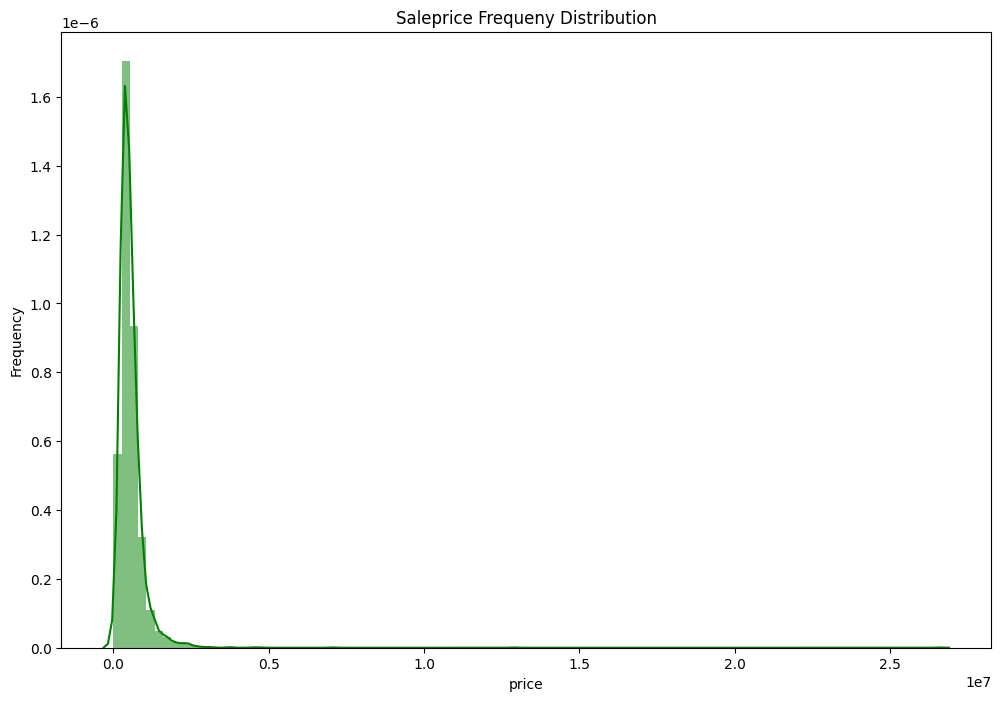

In [24]:
plt.figure(figsize = (12,8))
sns.distplot(dataset['price'] , color = 'g' , bins = 100 , hist_kws = {'alpha':0.5})
plt.title('Saleprice Frequeny Distribution')
plt.ylabel('Frequency')
plt.show()


### seprating numerical data

In [25]:
numeric_data = dataset.select_dtypes(include = ['int64' , 'float64'])
numeric_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

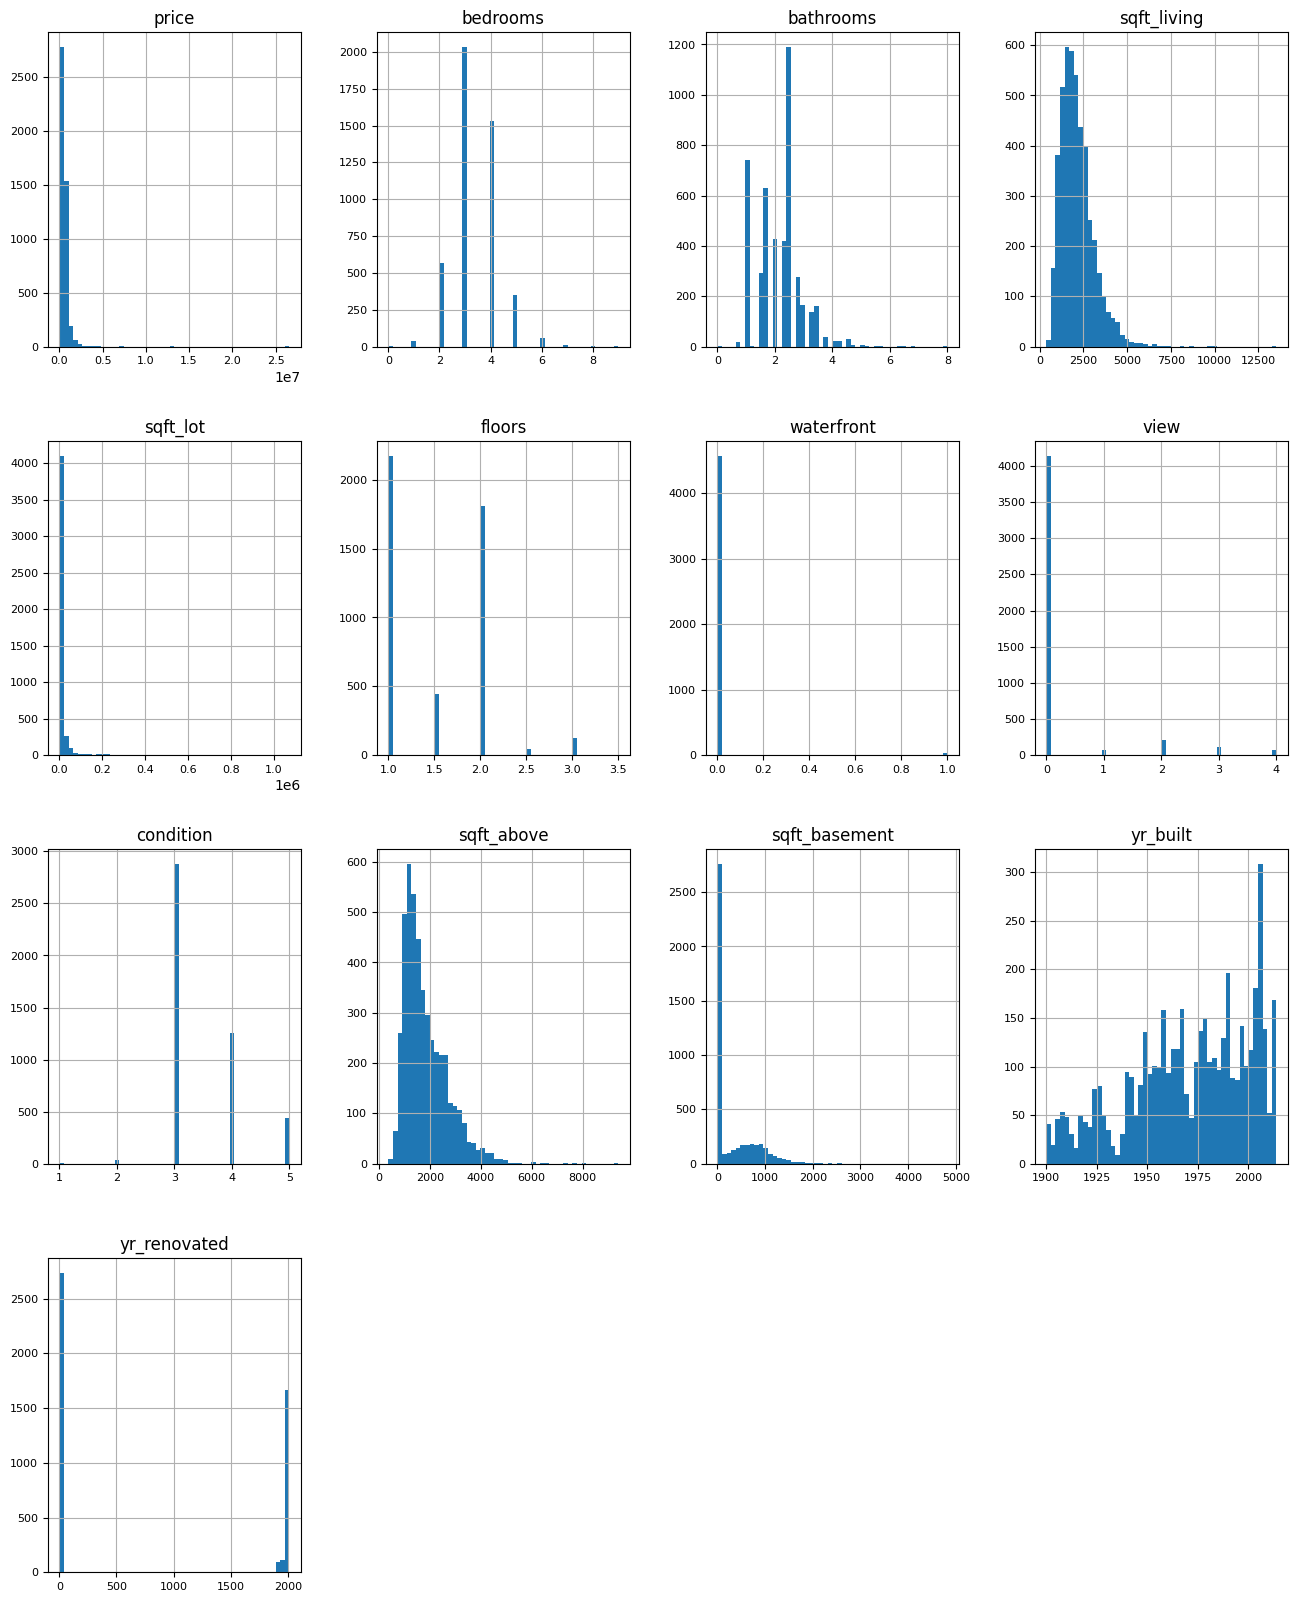

In [26]:
numeric_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Spliting the data into training and testing

In [27]:
import numpy as np

def split_data(dataset , test_size):
    data_indices = np.random.rand(len(dataset)) < test_size
    return dataset[~data_indices] , dataset[data_indices]

train_data , test_data = split_data(dataset , 0.3)
print(train_data.shape , test_data.shape)

(3226, 13) (1374, 13)


## Specifying the data


In [29]:
def to_tf_dataset(data , label):
    data = tfdf.keras.pd_dataframe_to_tf_dataset(data , label = label , task = tfdf.keras.Task.REGRESSION)
    return data
train = to_tf_dataset(train_data , 'price')
test = to_tf_dataset(test_data , 'price')

In [30]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

## Model Creation and Compilation

In [31]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics = ['mse'])

Use /tmp/tmp_qn_p0op as temporary training directory


## Fitting the model on training data

In [32]:
rf.fit(x = train)

Reading training dataset...
Training dataset read in 0:00:06.279461. Found 3226 examples.
Training model...
Model trained in 0:00:06.117574
Compiling model...
Model compiled.


## Model Evaluation

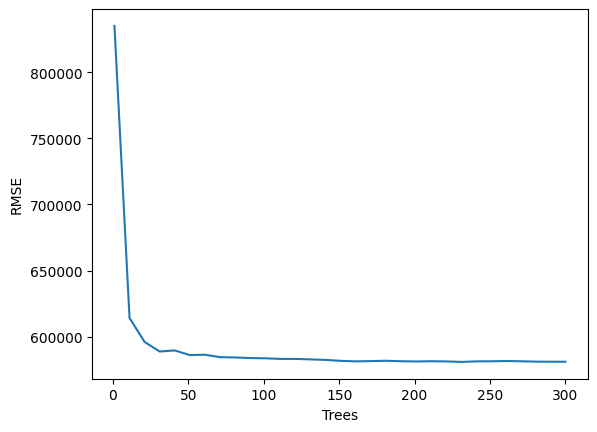

In [33]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs] , [log.evaluation.rmse for log in logs])
plt.xlabel('Trees')
plt.ylabel('RMSE')
plt.show()

In [34]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=3226, accuracy=None, loss=None, rmse=581101.9062377049, ndcg=None, aucs=None, auuc=None, qini=None)

In [35]:
evaluation = rf.evaluate(x = test , return_dict = True)
for name , value in evaluation.items():
    print(f'{name} , {value:.4f}')

2/2 [==============================] - 1s 31ms/step - loss: 0.0000e+00 - mse: 67573198848.0000
loss , 0.0000
mse , 67573198848.0000


### Cheking Variable importance

In [36]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("sqft_living" (1; #7), 115.0),
 ("sqft_above" (1; #5), 76.0),
 ("bathrooms" (1; #1), 45.0),
 ("sqft_basement" (1; #6), 39.0),
 ("view" (1; #9), 14.0),
 ("bedrooms" (1; #2), 5.0),
 ("waterfront" (1; #10), 4.0),
 ("floors" (1; #4), 1.0),
 ("sqft_lot" (1; #8), 1.0)]

Visualizing the importance of each variable


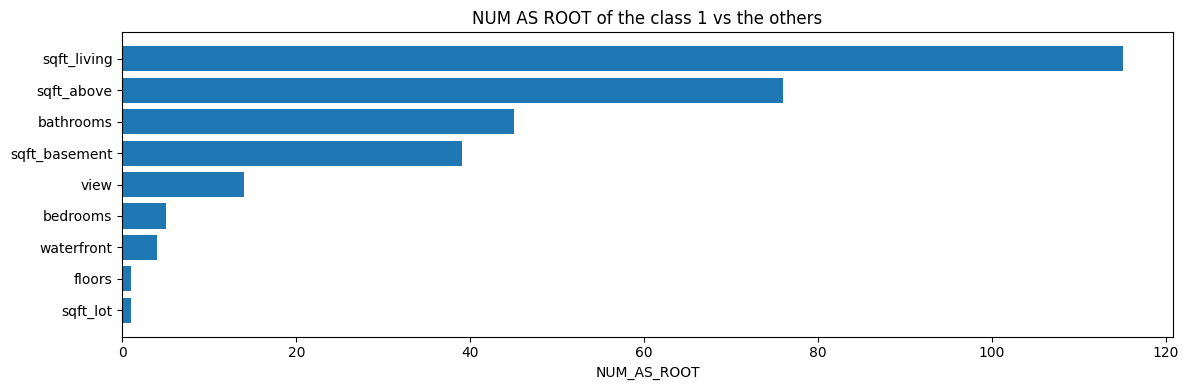

In [37]:
plt.figure(figsize=(12, 4))

variable_importances = inspector.variable_importances()["NUM_AS_ROOT"]

feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]

feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

plt.xlabel('NUM_AS_ROOT')
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

## Test dataset

In [51]:
test_file = pd.read_csv('/content/sample_data/output.csv')
test_file.drop(['date','street','city','statezip','country'],inplace=True,axis=1)
test_file.info()
test_file.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 467.3 KB


(4600, 13)

 Test dataset into tensoflow dataset.

In [52]:
test_data = tfdf.keras.pd_dataframe_to_tf_dataset(test_file , task = tfdf.keras.Task.REGRESSION)
predictions = rf.predict(test_data)
output = pd.DataFrame(
    {
        'price':predictions.squeeze()
    }
)
output.head()

5/5 [==============================] - 0s 60ms/step


,price
0,3.227163e+05
1,1.694814e+06
2,3.971261e+05
3,3.661414e+05
4,4.200193e+05


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)